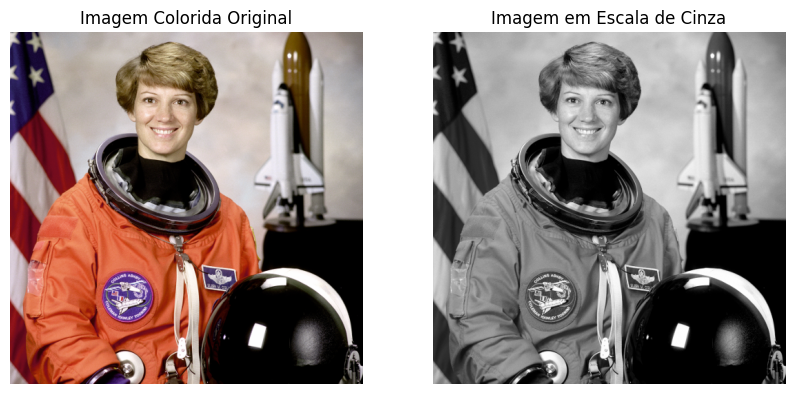

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Carregar uma imagem colorida do Scikit-Image (astronauta)
image = data.astronaut()

# Converter para um array NumPy
image_array = np.array(image)

# Extrair os canais de cor (R, G, B)
R, G, B = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]

# Aplicar a fórmula da luminância para converter para escala de cinza
gray_array = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# Exibir a imagem original e a convertida
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title("Imagem Colorida Original")
ax[0].axis("off")

ax[1].imshow(gray_array, cmap="gray")
ax[1].set_title("Imagem em Escala de Cinza")
ax[1].axis("off")

plt.show()


#Filtros com transformada de Fourier

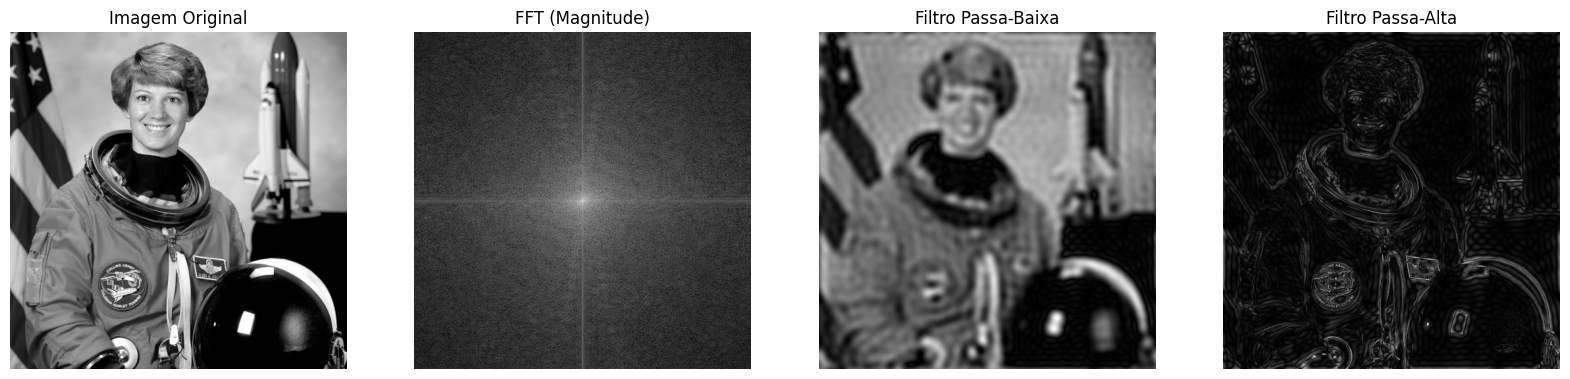

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# Carregar a imagem do astronauta e converter para escala de cinza
image = data.astronaut()
image_gray = color.rgb2gray(image).astype(np.float32)

# Aplicar a Transformada de Fourier 2D
fft_image = fft2(image_gray)
fft_image_shifted = fftshift(fft_image)  # Centraliza a FFT

# Criar um filtro passa-baixa (mantém baixas frequências)
def low_pass_filter(fft_image, radius=30):
    H, W = fft_image.shape
    center_x, center_y = H // 2, W // 2
    mask = np.zeros((H, W), dtype=np.float32)
    Y, X = np.ogrid[:H, :W]
    mask_area = (X - center_x)**2 + (Y - center_y)**2 <= radius**2
    mask[mask_area] = 1
    return fft_image * mask

# Criar um filtro passa-alta (remove baixas frequências)
def high_pass_filter(fft_image, radius=30):
    H, W = fft_image.shape
    center_x, center_y = H // 2, W // 2
    mask = np.ones((H, W), dtype=np.float32)
    Y, X = np.ogrid[:H, :W]
    mask_area = (X - center_x)**2 + (Y - center_y)**2 <= radius**2
    mask[mask_area] = 0
    return fft_image * mask

# Aplicar os filtros
fft_low_pass = low_pass_filter(fft_image_shifted, radius=30)
fft_high_pass = high_pass_filter(fft_image_shifted, radius=30)

# Transformadas inversas para reconstruir as imagens filtradas
image_low_pass = np.abs(ifft2(ifftshift(fft_low_pass)))
image_high_pass = np.abs(ifft2(ifftshift(fft_high_pass)))

# Exibir as imagens
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(image_gray, cmap="gray")
ax[0].set_title("Imagem Original")
ax[0].axis("off")

ax[1].imshow(np.log(1 + np.abs(fft_image_shifted)), cmap="gray")
ax[1].set_title("FFT (Magnitude)")
ax[1].axis("off")

ax[2].imshow(image_low_pass, cmap="gray")
ax[2].set_title("Filtro Passa-Baixa")
ax[2].axis("off")

ax[3].imshow(image_high_pass, cmap="gray")
ax[3].set_title("Filtro Passa-Alta")
ax[3].axis("off")

plt.show()


#EXERCÍCIO 1

Com base no material disponibilizado no moodle, implemente a conversão do espaço de imagem RGB para HSV